In [26]:
import tensorflow_probability as tfp
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

tfd = tfp.distributions

### Univariate distributions

In [3]:
normal = tfd.Normal(loc = 0, scale= 1)
normal

<tfp.distributions.Normal 'Normal' batch_shape=[] event_shape=[] dtype=float32>

In [4]:
normal.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.57395333, -0.7366003 ,  0.70328546,  1.1079689 , -0.93114746,
       -1.5996231 ,  0.4236755 ,  0.10163534,  1.2408421 ,  0.10214119],
      dtype=float32)>

In [5]:
normal.prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=0.3989423>

In [6]:
normal.log_prob(0)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.9189385>

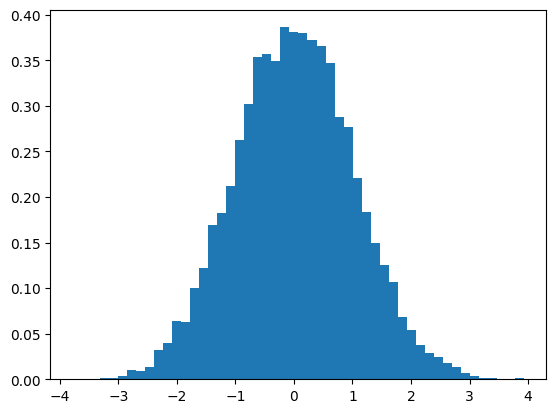

In [7]:
plt.hist(normal.sample(10000), bins=50, density=True)
plt.show()

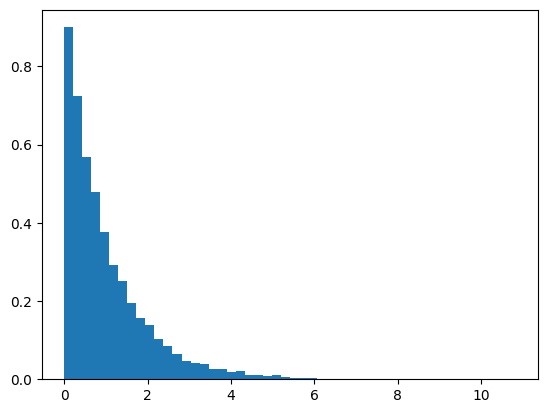

In [8]:
exp = tfd.Exponential(rate=1)
plt.hist(exp.sample(10000), bins=50, density=True)
plt.show()

In [10]:
exp.sample(10)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([1.2499045 , 0.38501045, 2.3525915 , 0.02209736, 0.13310383,
       0.1464417 , 1.1847539 , 0.9707899 , 0.23731004, 5.3751535 ],
      dtype=float32)>

In [11]:
bern = tfd.Bernoulli(probs=0.8)
bern.sample(20)

<tf.Tensor: shape=(20,), dtype=int32, numpy=
array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1],
      dtype=int32)>

In [12]:
for k in [0, 0.5, 1, -1]:
    print(f'prob result {bern.prob(k)} for k = {k}')

prob result 0.19999998807907104 for k = 0
prob result 0.3999999761581421 for k = 0.5
prob result 0.800000011920929 for k = 1
prob result 0.04999999701976776 for k = -1


In [13]:
def my_bernoulli(p_success, k):
    return np.power(p_success, k) * np.power((1 - p_success), (1 - k))

for k in [0, 0.5, 1, -1]:
    print(f'prob result {my_bernoulli(0.8, k)} for k = {k}')

prob result 0.19999999999999996 for k = 0
prob result 0.3999999999999999 for k = 0.5
prob result 0.8 for k = 1
prob result 0.049999999999999975 for k = -1


### batching

In [15]:
batch = tfd.Bernoulli(probs=[0.1, 0.25, 0.5, 0.75, 0.9])
batch, batch.sample(5)

(<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[5] event_shape=[] dtype=int32>,
 <tf.Tensor: shape=(5, 5), dtype=int32, numpy=
 array([[0, 1, 1, 1, 0],
        [0, 1, 0, 1, 0],
        [0, 0, 0, 1, 1],
        [0, 0, 1, 1, 1],
        [0, 0, 1, 1, 1]], dtype=int32)>)

### Multivariate distributions

In [16]:
mv_normal = tfd.MultivariateNormalDiag(loc=[-1, 0.5], scale_diag=[1., 1.5])
mv_normal.sample(3)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-2.1218948, -0.4061001],
       [-0.6534778, -1.0461687],
       [ 1.7318771,  0.8365035]], dtype=float32)>

In [19]:
batched_mv_normal = tfd.MultivariateNormalDiag(
    loc=[[0.3, 0.8, 1.1], [2.3, -0.3, -1.]], 
    scale_diag=[[1.5, 1., 0.4], [2.5, 1.5, 0.5]])
batched_mv_normal.sample(2), batched_mv_normal.log_prob(2)

(<tf.Tensor: shape=(2, 2, 3), dtype=float32, numpy=
 array([[[-0.7872445 ,  0.5276246 ,  0.45029706],
         [ 1.2372317 , -0.82176465, -1.1083218 ]],
 
        [[ 1.7197468 ,  3.394865  ,  1.0880759 ],
         [ 4.6614923 , -2.8084538 , -0.63088953]]], dtype=float32)>,
 <tf.Tensor: shape=(2,), dtype=float32, numpy=array([ -6.1394625, -22.568178 ], dtype=float32)>)

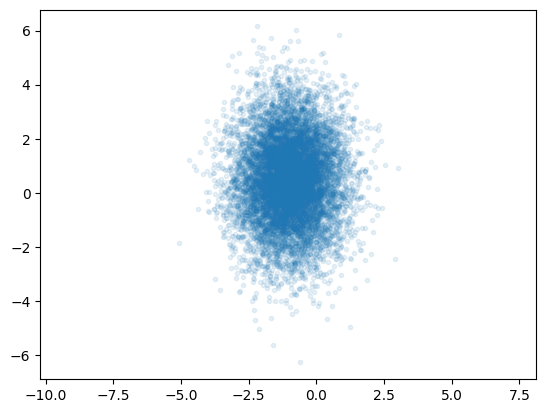

In [20]:
plt_sample = mv_normal.sample(10000)
plt.scatter(plt_sample[:, 0], plt_sample[:, 1], alpha=0.1, marker='.')
plt.axis('equal')
plt.show()

In [21]:
mv_diag_batch = tfd.MultivariateNormalDiag(loc=[[0, 0], [0, 0], [0, 0]],
                                           scale_diag=[[1,2], [2,1], [2,2]])
mv_diag_batch.sample(5)

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[-0.68502486,  1.7929417 ],
        [ 0.5535212 ,  1.7140312 ],
        [ 2.7115152 , -0.6843428 ]],

       [[ 1.034392  ,  3.0223165 ],
        [-3.2087805 ,  0.03395152],
        [-2.1032326 , -0.28592825]],

       [[-0.4444488 ,  1.3054157 ],
        [-2.2768397 ,  0.76096004],
        [-1.3134722 , -0.12630333]],

       [[ 0.21429908,  1.9573734 ],
        [ 2.005177  , -0.21567018],
        [-2.1754198 , -0.49547762]],

       [[-0.6754821 ,  0.61661404],
        [ 2.1609144 , -0.40518853],
        [-0.11691702,  1.442653  ]]], dtype=float32)>

In [22]:
mv_diag_batch.log_prob(mv_diag_batch.sample(5))

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-2.5870798, -5.489065 , -3.7951565],
       [-2.5508   , -2.7409346, -4.3129086],
       [-3.3533032, -2.713956 , -3.6510668],
       [-4.471968 , -2.853004 , -3.8975596],
       [-2.6453834, -3.8463902, -3.5522275]], dtype=float32)>

In [23]:
plt_sample_batch = mv_diag_batch.sample(10000)
plt_sample_batch.shape

TensorShape([10000, 3, 2])

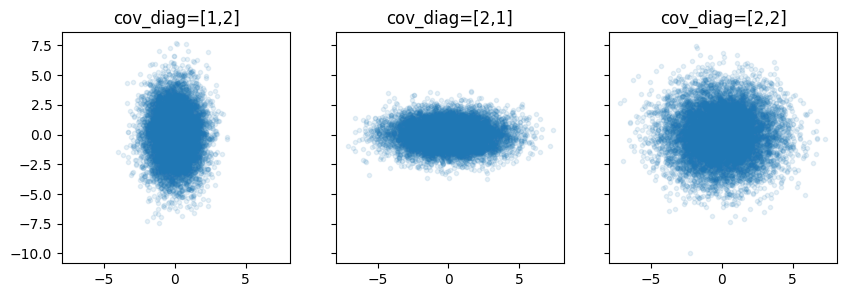

In [24]:
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize=(10, 3))

titles = ['cov_diag=[1,2]', 'cov_diag=[2,1]', 'cov_diag=[2,2]']
for i, (ax, title) in enumerate(zip(axs, titles)):
    ax.scatter(plt_sample_batch[:, i, 0], plt_sample_batch[:, i, 1], alpha=0.1, marker='.')
    ax.set_title(title)

### Multivariate gaussian with full covariance 

- spherical/isotropic Gaussian (when variance is the same for each component $\Sigma = \sigma^2I$)

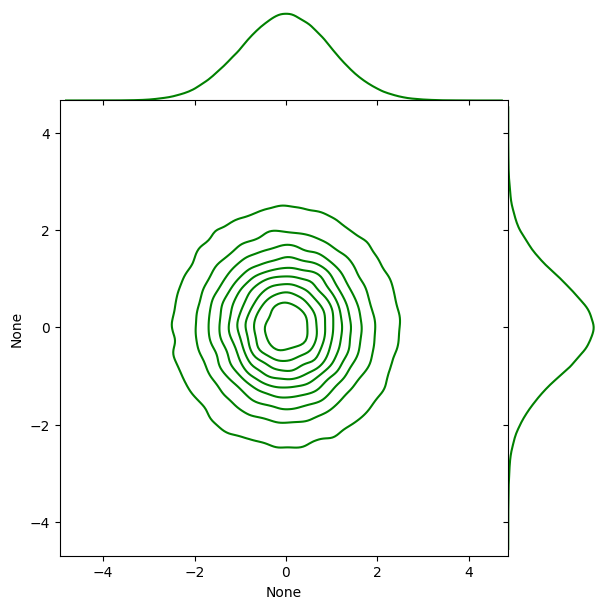

In [29]:
s2d_gaussian = tfd.MultivariateNormalDiag(loc=[0., 0.])

x = s2d_gaussian.sample(100000)
x1 = x[:, 0]
x2 = x[:, 1]
sns.jointplot(x=x1, y=x2, kind='kde', space=0, color='g');

- `tfd.MutivariateNormalTriL` requires: 
  - `loc`: floats corresponding to $\mu$
  - `scale_tril`: lower-triangular matrix $L$ such that $\Sigma = LL^T$
- Covariance matrix: a matrix where the diagonal entries are the variances of each variable and the off-diagonal entries are the covariances between each pair of variables. i.e., 

\begin{equation}
\begin{bmatrix} 
  var(x) & cov(x, y) \\
  cov(x, y) & var(x)

\end{bmatrix}
\end{equation}

- The covariance matrix must be symmetric and positive semi-definite. (A symmetric matrix $M \in \mathbb{R}^{d\times d}$ is positive semi-definite if it satisfies $b^TMb \ge 0$ for all nonzero $b\in\mathbb{R}^d$. If, in addition, we have $b^TMb = 0 \Rightarrow b=0$ then $M$ is positive definite.) --> cholesky decomposition for computing covariance matrix: For every real-valued symmetric positive-definite matrix M, there is a unique lower-diagonal matrix $L$ that has positive diagonal entries for which $LL^T = M$
- If the matrix is only positive semi-definite, the Cholesky decomposition exists but is not unique. For covariance matrices, this corresponds to the degenerate case where the probability density function collapses to a subspace of the event space.
- If the covariance matrix for the multivariate Guassian distribution is positive-definite, then an algorithm that computes the Cholesky decomposition of $\Sigma$ returns a lower-triangular matrix $L$ such that $LL^T = \Sigma$. The $L$ can be passed to `tfd.MultivariateNormalTriL` as the `scale_tril` argument.

In [31]:
scale_tril = [[1., 0.,],
              [0.6, 0.8]]

tf.matmul(
    tf.constant(scale_tril),
    tf.transpose(tf.constant(scale_tril))
)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1. , 0.6],
       [0.6, 1. ]], dtype=float32)>

In [33]:
non_spherical_2d_gaussian = tfd.MultivariateNormalTriL(
    loc=[0, 0], scale_tril=scale_tril
)

non_spherical_2d_gaussian.mean(), non_spherical_2d_gaussian.covariance()

(<tf.Tensor: shape=(2,), dtype=float32, numpy=array([0., 0.], dtype=float32)>,
 <tf.Tensor: shape=(2, 2), dtype=float32, numpy=
 array([[1. , 0.6],
        [0.6, 1. ]], dtype=float32)>)

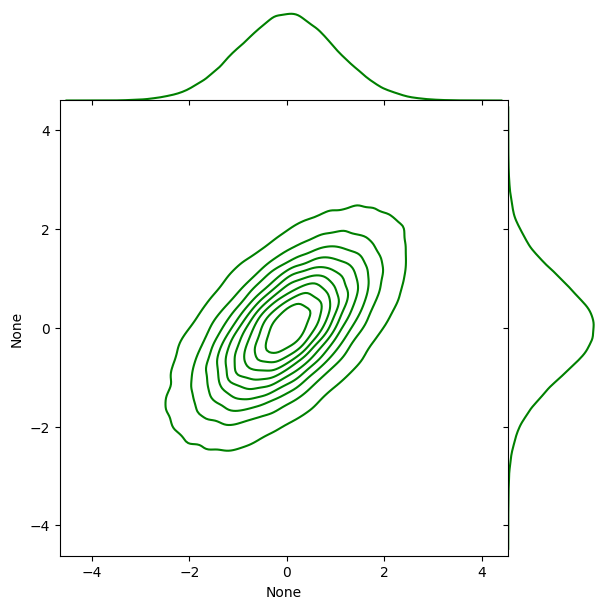

In [34]:
x = non_spherical_2d_gaussian.sample(100000)
x1 = x[:, 0]
x2 = x[:, 1]
sns.jointplot(x=x1, y=x2, kind='kde', space=0, color='g');

In [35]:
sigma = [[10., 5.], 
         [5., 10.]]

tf.linalg.cholesky(sigma)

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[3.1622777, 0.       ],
       [1.5811388, 2.738613 ]], dtype=float32)>

In [36]:
tf.linalg.matmul(scale_tril, tf.transpose(scale_tril)) #LL^T = Sigma

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[1. , 0.6],
       [0.6, 1. ]], dtype=float32)>

In [37]:
# Try to compute the Cholesky decomposition for a matrix with negative eigenvalues

bad_sigma = [[10., 11.], 
             [11., 10.]]

try:
    scale_tril = tf.linalg.cholesky(bad_sigma)
except Exception as e:
    print(e)

2023-12-16 15:55:23.429539: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


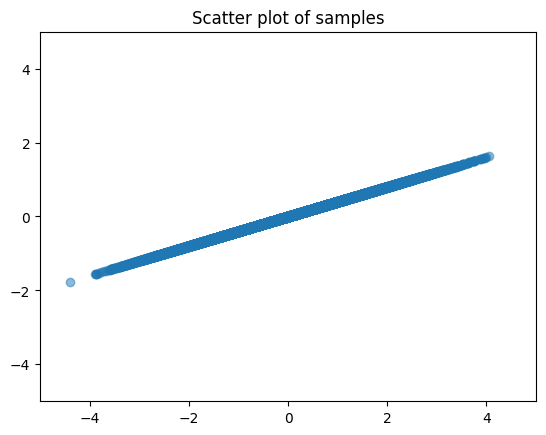

In [39]:
# semi definite covariance matrix
psd_mvn = tfd.MultivariateNormalTriL(loc=[0., 0.], scale_tril=[[1., 0.], [0.4, 0.]])

x = psd_mvn.sample(100000)
x1 = x[:, 0]
x2 = x[:, 1]
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.title("Scatter plot of samples")
plt.scatter(x1, x2, alpha=0.5);

In [40]:
# tf.linalg.cholesky will also fail for positive semi-definite but not positive definite matrics

another_bad_sigma = [[10., 0.], [0., 0.]]

try:
    scale_tril = tf.linalg.cholesky(another_bad_sigma)
except Exception as e:
    print(e)

2023-12-16 16:02:08.345999: W tensorflow/core/kernels/linalg/cholesky_op.cc:56] Cholesky decomposition was not successful. Eigen::LLT failed with error code 1. Filling lower-triangular output with NaNs.


To create a multivariate Gaussian distribution with full covariance you need to:

1. Specify parameters $\mu$ and either $\Sigma$ (a symmetric positive definite matrix) or $L$ (a lower triangular matrix with positive diagonal elements), such that $\Sigma = LL^T$.

2. If only $\Sigma$ is specified, compute `scale_tril = tf.linalg.cholesky(sigma)`.

3. Create the distribution: `multivariate_normal = tfd.MultivariateNormalTriL(loc=mu, scale_tril=scale_tril)`.

In [43]:
# Create a multivariate Gaussian distribution

mu = [1., 2., 3.]
sigma = [[0.5, 0.1, 0.1],
         [0.1,  1., 0.6],
         [0.1, 0.6, 2.]]

scale_tril = tf.linalg.cholesky(sigma)

multivariate_normal = tfd.MultivariateNormalTriL(loc=mu, scale_tril=scale_tril)

# Check the covariance matrix
multivariate_normal.covariance(), multivariate_normal.mean()

(<tf.Tensor: shape=(3, 3), dtype=float32, numpy=
 array([[0.49999997, 0.1       , 0.1       ],
        [0.1       , 1.0000001 , 0.6       ],
        [0.1       , 0.6       , 2.        ]], dtype=float32)>,
 <tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>)